In [1]:
import time
import numpy as np
from numpy import *
import matplotlib.pylab as plt
import operator
import pyscf
from pyscf import gto, scf, dft, tddft, data
#np.set_printoptions (linewidth=300)

elements = ['H' , 'He', 'Li', 'Be', 'B' , 'C' , 'N' , 'O' , 'F' , 'Ne',
    'Na', 'Mg', 'Al', 'Si', 'P' , 'S' , 'Cl', 'Ar', 'K' , 'Ca',
    'Sc', 'Ti', 'V' , 'Cr', 'Mn', 'Fe', 'Co', 'Ni', 'Cu', 'Zn',
    'Ga', 'Ge', 'As', 'Se', 'Br', 'Kr', 'Rb', 'Sr', 'Y' , 'Zr',
    'Nb', 'Mo', 'Tc', 'Ru', 'Rh', 'Pd', 'Ag', 'Cd', 'In', 'Sn',
    'Sb', 'Te', 'I' , 'Xe', 'Cs', 'Ba', 'La', 'Ce', 'Pr', 'Nd',
    'Pm', 'Sm', 'Eu', 'Gd', 'Tb', 'Dy', 'Ho', 'Er', 'Tm', 'Yb',
    'Lu', 'Hf', 'Ta', 'W' , 'Re', 'Os', 'Ir', 'Pt', 'Au', 'Hg',
    'Tl', 'Pb', 'Bi', 'Po', 'At', 'Rn', 'Fr', 'Ra', 'Ac', 'Th',
    'Pa', 'U' , 'Np', 'Pu'] 
hardness = [
0.47259288,
0.92203391,
0.17452888,
0.25700733,
0.33949086,
0.42195412,
0.50438193,
0.58691863,
0.66931351,
0.75191607,
0.17964105,
0.22157276,
0.26348578,
0.30539645,
0.34734014,
0.38924725,
0.43115670,
0.47308269,
0.17105469,
0.20276244,
0.21007322,
0.21739647,
0.22471039,
0.23201501,
0.23933969,
0.24665638,
0.25398255,
0.26128863,
0.26859476,
0.27592565,
0.30762999,
0.33931580,
0.37235985,
0.40273549,
0.43445776,
0.46611708,
0.15585079,
0.18649324,
0.19356210,
0.20063311,
0.20770522,
0.21477254,
0.22184614,
0.22891872,
0.23598621,
0.24305612,
0.25013018,
0.25719937,
0.28784780,
0.31848673,
0.34912431,
0.37976593,
0.41040808,
0.44105777,
0.05019332,
0.06762570,
0.08504445,
0.10247736,
0.11991105,
0.13732772,
0.15476297,
0.17218265,
0.18961288,
0.20704760,
0.22446752,
0.24189645,
0.25932503,
0.27676094,
0.29418231,
0.31159587,
0.32902274,
0.34592298,
0.36388048,
0.38130586,
0.39877476,
0.41614298,
0.43364510,
0.45104014,
0.46848986,
0.48584550,
0.12526730,
0.14268677,
0.16011615,
0.17755889,
0.19497557,
0.21240778,
0.07263525,
0.09422158,
0.09920295,
0.10418621,
0.14235633,
0.16394294,
0.18551941,
0.22370139]
#in Hartree
HARDNESS = dict(zip(elements,hardness))

In [2]:
mol = gto.Mole()
mol.build(atom = '\
C         -4.89126        3.29770        0.00029;\
O         -3.49307        3.28429       -0.00328;\
H         -5.28213        2.58374        0.75736;\
H         -5.28213        3.05494       -1.01161;\
H         -5.23998        4.31540        0.27138;\
H         -3.22959        2.35981       -0.24953',\
basis = 'def2-SVP')

In [3]:
# mol = gto.Mole()
# mol.build(atom = 'O         -4.89126        3.29770        0.00029;\
# H         -3.49307        3.28429       -0.00328;\
# H         -5.28213        2.58374        0.75736', basis = 'def2-SVP', symmetry = True)

In [4]:
# mol = gto.Mole()
# mol.build(atom = '\
# C         -1.44673        2.80824       -0.07813;\
# O         -1.78998        3.80792       -0.69188;\
# N         -1.18291        1.66325       -0.74926;\
# N         -1.33221        2.85136        1.26946;\
# H         -1.53168        3.72026        1.78651;\
# H         -1.04365        2.01512        1.79805;\
# H         -1.26824        1.62382       -1.77554;\
# H         -0.89270        0.81388       -0.24298'\
# , basis = 'def2-SVP', symmetry = True)

In [5]:
# mf = dft.RKS(mol) 
# mf.conv_tol = 1e-12
# mf.grids.level = 9     # 0-9, big number for large mesh grids, default is 3
# mf.xc = 'b3lyp'
# mf.kernel()  #single point energy

In [6]:
mf = dft.RKS(mol) 
mf.conv_tol = 1e-12
mf.grids.level = 9     # 0-9, big number for large mesh grids, default is 3
mf.xc = 'cam-b3lyp'
mf.kernel()  #single point energy

#ORCA: FINAL SINGLE POINT ENERGY = -115.576160742154
#Turbomole: total energy      =    -115.57615989622

converged SCF energy = -115.576159894913


-115.57615989491322

In [7]:
# mf = scf.RHF(mol) 
# mf.conv_tol = 1e-13
# mf.kernel()  #single point energy

In [8]:
# CIS = pyscf.tdscf.rhf.CIS(mf)
# CIS.nstates = 5
# CIS.kernel()

In [9]:
# td = tddft.TDA(mf)
# start = time.time()
# td.kernel()    #compute first few excited states.
# end = time.time()
# print ('Pyscf time =', round(end-start,4))

In [10]:
#print (mol.atom_coords())
#array for the coordinates (in Bohr) of each atom 1 Bohr = 0.529177 Angstrom
#print (mol.unit)

In [11]:
mol.ao_labels()

['0 C 1s    ',
 '0 C 2s    ',
 '0 C 3s    ',
 '0 C 2px   ',
 '0 C 2py   ',
 '0 C 2pz   ',
 '0 C 3px   ',
 '0 C 3py   ',
 '0 C 3pz   ',
 '0 C 3dxy  ',
 '0 C 3dyz  ',
 '0 C 3dz^2 ',
 '0 C 3dxz  ',
 '0 C 3dx2-y2',
 '1 O 1s    ',
 '1 O 2s    ',
 '1 O 3s    ',
 '1 O 2px   ',
 '1 O 2py   ',
 '1 O 2pz   ',
 '1 O 3px   ',
 '1 O 3py   ',
 '1 O 3pz   ',
 '1 O 3dxy  ',
 '1 O 3dyz  ',
 '1 O 3dz^2 ',
 '1 O 3dxz  ',
 '1 O 3dx2-y2',
 '2 H 1s    ',
 '2 H 2s    ',
 '2 H 2px   ',
 '2 H 2py   ',
 '2 H 2pz   ',
 '3 H 1s    ',
 '3 H 2s    ',
 '3 H 2px   ',
 '3 H 2py   ',
 '3 H 2pz   ',
 '4 H 1s    ',
 '4 H 2s    ',
 '4 H 2px   ',
 '4 H 2py   ',
 '4 H 2pz   ',
 '5 H 1s    ',
 '5 H 2s    ',
 '5 H 2px   ',
 '5 H 2py   ',
 '5 H 2pz   ']

In [12]:
AO = [int(i.split(' ',1)[0]) for i in mol.ao_labels()] 
# .split(' ',1) is to split each element by space, split once.
# mol.ao_labels() it is Labels of AO basis functions, AO is a list of corresponding atom_id
# AO == [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2]

N_bf = len(AO)
#print (AO) 
print ('Number of AOs =', N_bf)

Number of AOs = 48


In [13]:
mf.analyze()
##MO energies

**** MO energy ****
MO #1   energy= -19.1952561270171  occ= 2
MO #2   energy= -10.3010530904295  occ= 2
MO #3   energy= -1.07886778616714  occ= 2
MO #4   energy= -0.73996126856522  occ= 2
MO #5   energy= -0.567432132162965 occ= 2
MO #6   energy= -0.5087403521188   occ= 2
MO #7   energy= -0.489011243627256 occ= 2
MO #8   energy= -0.38983000078517  occ= 2
MO #9   energy= -0.32963505042571  occ= 2
MO #10  energy= 0.0931164613349232 occ= 0
MO #11  energy= 0.139419598372696  occ= 0
MO #12  energy= 0.181166706809678  occ= 0
MO #13  energy= 0.182831010635641  occ= 0
MO #14  energy= 0.251599145722025  occ= 0
MO #15  energy= 0.511964195510831  occ= 0
MO #16  energy= 0.528996546419146  occ= 0
MO #17  energy= 0.540181611595554  occ= 0
MO #18  energy= 0.636931978034218  occ= 0
MO #19  energy= 0.699381613550386  occ= 0
MO #20  energy= 0.710210214191175  occ= 0
MO #21  energy= 0.726442574320819  occ= 0
MO #22  energy= 0.765726116384927  occ= 0
MO #23  energy= 1.01683121616566   occ= 0
MO #24  energy

((array([1.99985335e+00, 9.93500412e-01, 5.33335187e-03, 7.92360566e-01,
         1.12785755e+00, 1.10710106e+00, 8.58049969e-03, 5.25718176e-03,
         6.70895371e-03, 1.39553017e-03, 1.10079542e-03, 1.59722790e-03,
         2.46742305e-03, 2.65222708e-03, 1.99993301e+00, 1.62054232e+00,
         5.19239327e-03, 1.39154442e+00, 1.53619124e+00, 1.92498858e+00,
         4.51671731e-03, 3.86529652e-03, 3.28767840e-03, 9.00137431e-04,
         1.17810146e-03, 1.61378931e-03, 5.74724620e-04, 3.00241388e-03,
         9.17452607e-01, 6.25006019e-03, 2.63304643e-04, 4.86256474e-04,
         6.41787291e-04, 9.17449723e-01, 6.25035381e-03, 2.63309126e-04,
         6.83845688e-05, 1.05968086e-03, 8.90121385e-01, 7.16964601e-03,
         1.39872182e-04, 1.01026545e-03, 1.04696133e-04, 6.83239269e-01,
         1.05064846e-02, 1.03895483e-03, 1.53260502e-03, 1.85439882e-03]),
  array([-0.05576613, -0.49733083,  0.07490598,  0.07490855,  0.10145414,
          0.30182829])),
 array([-0.8947345 , -1

In [14]:
Natm = mol.natm #number of atoms

MOe = mf.mo_energy  #an array of MO energies, in Hartree
#print (MOe)

occupied = len(np.where(mf.mo_occ > 0)[0])
#mf.mo_occ is an array of occupance [2,2,2,2,2,0,0,0,0.....]
virtual = N_bf - occupied
#print (occupied, virtual, N_bf)

In [15]:
#check whether a is symmetric
def check_symmetric(a, tol=1e-12):
    return np.all(np.abs(a-a.T) < tol)

In [16]:
#mf.mulliken_pop_meta_lowdin_ao()
#population analysis
#mf.mulliken_pop()

In [61]:
c = mf.mo_coeff 
# mf.mo_coeff is the coefficient matrix
print (np.shape(c))
#print (np.round(c,2))
#print (check_symmetric(c, tol=1e-8))

#S = np.dot(np.linalg.inv(c.T), np.linalg.inv(c))

S = mf.get_ovlp() #.get_ovlp() is basis overlap matrix

s,ket = np.linalg.eigh(S)
#s are eigenvalues, must be all positive
#each column of ket is a eigenket

s = s**0.5
X = np.linalg.multi_dot([ket,np.diag(s),ket.T])
#X == S^1/2

C = np.dot(X,c)
# rthogonalized MO coefficients 
#print (check_symmetric(C, tol=1e-8))

#check orthogonalization
# for i in range (0, N_bf):
#     #C[:,i] = C[:,i]/np.linalg.norm(C[:,i])
#     print (np.linalg.norm(C[:,i]))

(48, 48)


In [64]:
def generateQ (atom_id):
    q = np.zeros([N_bf, N_bf])
    #N_bf is number Atimic orbitals, q is same size with C
    for i in range (0, N_bf):
        for p in range (0, N_bf):
            for mu in range (0, N_bf):
                if AO[mu] == atom_id:
                    #collect all basis functions centered on atom_id
                    # the last loop is to sum up all C_mui*C_mup, calculate element q[i,p]
                    q[i,p] += C[mu,i]*C[mu,p]
                    #q[i,p] += 2*C[i,mu]*C[p,mu]
    return q


Qmatrix = [(generateQ(atom_id)) for atom_id in range (0, Natm)]
#a list of q matrix
#print (Qmatrix[0])


#home_made analysis
# for atom_id in range (0, Natm):
#     print (check_symmetric(Qmatrix[atom_id], tol=1e-12))
#     m = 0
#     for i in range (0, occupied):
#         m += Qmatrix[atom_id][i,i]
#         #sum over occupied orbitals
#     print (m)


In [66]:
a_x = 0.38

beta1= 1.86
beta2=0

alpha1= 0.9
alpha2=0

beta = beta1 + beta2 * a_x
alpha = alpha1 + alpha2 * a_x

print ('beta =', beta, 'alpha =', alpha)

beta = 1.86 alpha = 0.9


In [50]:
#function to return chemical hardness from dictionary HARDNESS
def Hardness (atom_id):
    atom = mol.atom_pure_symbol(atom_id) 
    return HARDNESS[atom]
# mol.atom_pure_symbol(atom_id) returns pure element symbol, no special characters


In [51]:
def eta (atom_A_id, atom_B_id):
    eta = (Hardness(atom_A_id) + Hardness(atom_B_id))/2
    return eta
#eta(0,0)

In [52]:
R = pyscf.gto.mole.inter_distance(mol, coords=None) 
#Inter-particle distance array
# unit == ’Bohr’, Its value is 5.29177210903(80)×10^(−11) m
#function to return distance between two atoms
# def distance (atom_A_id, atom_B_id):
# #   distance = R [atom_A_id, atom_B_id]
#     a = mol.atom_coord(atom_A_id) #coordinates of atom A
#     b = mol.atom_coord(atom_B_id) #coordinates of atom B
#     distance = np.linalg.norm (a - b)
#     return distance
# print (R[3,4], distance(3,4))

def gammaJ (atom_A_id, atom_B_id):
    gamma_A_B_J = (R[atom_A_id, atom_B_id]**beta + (a_x * eta(atom_A_id, atom_B_id))**(-beta))**(-1/beta)
    return gamma_A_B_J
#print (gammaJ (2,2))

def gammaK (atom_A_id, atom_B_id):
    gamma_A_B_K = (R[atom_A_id, atom_B_id]**alpha + eta(atom_A_id, atom_B_id)**(-alpha)) **(-1/alpha)
    return gamma_A_B_K
#print (gammaK (2,2))


#build gammaJ and gammaK matrix
GammaJ = np.zeros([Natm, Natm])
for i in range (0, Natm):
    for j in range (0, Natm):
        GammaJ[i,j] = gammaJ (i,j)
        
GammaK = np.zeros([Natm, Natm])
for i in range (0, Natm):
    for j in range (0, Natm):
        GammaK[i,j] = gammaK (i,j)
# print (GammaJ)
# print (GammaK)

In [53]:
#define two electron intergeral (pq|rs)
def ele_intJ (i,j,a,b):
    ijab = 0
    for atom_A_id in range (0, Natm):
        for atom_B_id in range (0, Natm):
            ijab += Qmatrix[atom_A_id][i,j] * Qmatrix[atom_B_id][a,b] * GammaJ[atom_A_id, atom_B_id]
    return ijab
        
def ele_intK (i,a,j,b):
    iajb = 0
    for atom_A_id in range (0, Natm):
        for atom_B_id in range (0, Natm):
            iajb += Qmatrix[atom_A_id][i,a] * Qmatrix[atom_B_id][j,b] * GammaK[atom_A_id, atom_B_id]
    return iajb

In [54]:
#build A matrix
def build_A ():
    A = np.zeros ([occupied*virtual, occupied*virtual])
    m = -1
    for i in range (0, occupied):
        for a in range (occupied, N_bf):
            m += 1 #for each ia pair, it corresponds to a certain row
            n = -1
            for j in range (0, occupied):
                for b in range (occupied, N_bf):
                    n += 1 #for each jb pair, it corresponds to a certain column        
                    if i==j and a==b:
                        A[m,n] = (MOe[a]-MOe[i]) + 2*ele_intK(i,a,j,b) - ele_intJ(i,j,a,b)
                    else:
                        A[m,n] = 2*ele_intK(i,a,j,b) - ele_intJ(i,j,a,b)
    print (np.shape(A))
    return A

start = time.time()
A = build_A ()*27.21138624598853
end = time.time()

print ('A_sTDA building time =', round (end - start, 2))

(351, 351)
A_sTDA building time = 8.22


In [55]:
print (check_symmetric(A, tol=1e-8))

True


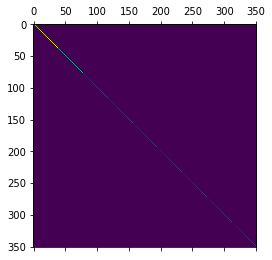

In [56]:
plt.matshow(A)
plt.show()

In [67]:
eigv,eigk = np.linalg.eigh(A)
idx = eigv.argsort()
eigv = eigv[idx]    #eigenvalues
eigk = eigk[:,idx]          #eigenkets, m*m

#np.linalg.eigh guarantees you that the eigenvalues are sorted and uses a faster algorithm 
#that takes advantage of the fact that the matrix is symmetric. 

print (np.round (eigv[:10],4))   
# ':n', first n elements; 'n:' all elements except firt n 
# should be [14.7861 .....]
# [14.7863 16.0911 16.2113 17.4589 17.5542 17.5846 18.8167 18.927  19.1089 19.7233] C[mu,i]C[mu,p]
# [ 8.3034 10.112  10.3799 11.5895 12.1404 12.3401 13.0298 13.3296 13.5589 13.8144] 2*C[mu,i]C[mu,p]
# [14.5926 15.9815 16.0668 17.1443 17.2626 17.5604 18.4418 18.6997 18.903 19.5775] C[i,mu]C[p,mu]
# [ 7.7439  9.2133  9.6458 10.5098 10.9138 11.3853 11.9624 12.7994 13.0573 13.3894] 2*C[i,mu]C[p,mu]

[ 6.7657  8.3894  8.6479  9.7055  9.8257 10.1774 11.0724 11.4403 11.5149
 11.7099]


In [30]:
#a,b = np.linalg.eigh(A_TDA) 
# to ensure A_TDA is the A matrix in TDA, eigenvalues are same with results solved by build-in methods

In [31]:
#print (a[:5]*27.21138624598853)

In [29]:
# #this block is to reprocude the TDA A matrix

# start = time.time()
# vind, hdiag = td.gen_vind(mf)
# n = len(hdiag)
# print ('size of A_TDA is', n)
# A_TDA = np.zeros((n,n))
# I = np.eye(n)
# for i in range (0,n):
#     A_TDA[:,i] = vind (I[:,i])
# end = time.time()
# print ('vind time =', np.round (end - start,2))
# plt.matshow(A_TDA)
# plt.show() #visualize the matrix

# # the true A matrix in TAD

In [32]:
#print (np.round(A_TDA.diagonal(),2))

In [33]:
#function to return distance between two atoms
# def distance (atom_A_id, atom_B_id):
# #   distance = R [atom_A_id, atom_B_id]
#     a = mol.atom_coord(atom_A_id) #coordinates of atom A
#     b = mol.atom_coord(atom_B_id) #coordinates of atom B
#     distance = np.linalg.norm (a - b)
#     return distance
# #(mol.atom_coord(atom_id)) is to return the coordinates of a certain atom, it is a ndarray


In [34]:
#nocc = mol.nelectron 
# mol.nelectron is number of electrons, not necessary the number of MOs